In [1]:
import earthkit.data
import earthkit.plots

In [2]:
from datetime import datetime

In [3]:
YEARS = {
    1993: "Normal conditions",
    1997: "El Niño",
    1998: "La Niña",
}

DOMAIN = [100, 300, -20, 20]

In [4]:
data = earthkit.data.from_source(
    "cds", "reanalysis-era5-single-levels-monthly-means",
    {
        "product_type": "monthly_averaged_reanalysis",
        "variable": "sea_surface_temperature",
        "year": list(YEARS),
        "month": "12",
        "time": "00:00",
        "area": [20, 100, -20, -60],
        "grid": [0.25, 0.25],
    },
)

In [5]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sst,surface,0,19931201,0,0,an,0,regular_ll
1,ecmf,sst,surface,0,19971201,0,0,an,0,regular_ll
2,ecmf,sst,surface,0,19981201,0,0,an,0,regular_ll


In [6]:
STYLE = earthkit.plots.styles.Style(
    colors="Spectral_r",
    levels=range(15, 33),
    units="celsius",
    ticks=range(15, 33),
)

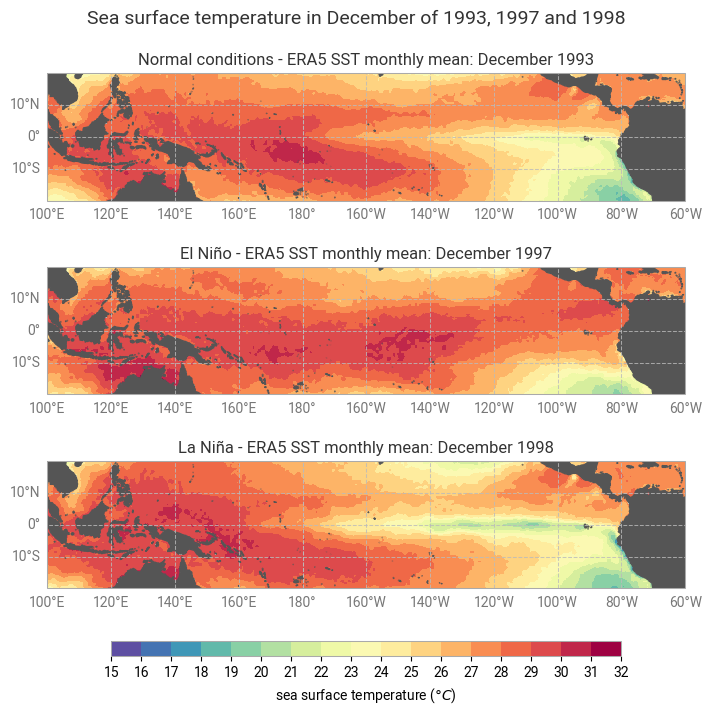

In [7]:
figure = earthkit.plots.Figure(rows=3)

for i, year in enumerate(YEARS):
    subplot = figure.add_map(domain=DOMAIN)
    subplot.block(data[i], style=STYLE)
    subplot.title(f"{YEARS[year]} - ERA5 {{short_name!u}} monthly mean: {{time:%B %Y}}")

figure.land(color="#555", zorder=2)
figure.gridlines(xstep=20, ystep=10, linestyle="--")

figure.title("{variable_name} in {time:%B} of {time:%Y}", fontsize=14)

figure.legend(label="{variable_name!l} ({units})")

figure.show()